In [141]:
import numpy
import sys
import matplotlib
import pandas
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
Numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2


In [142]:
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report , accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [143]:
#To remove future warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [144]:
#Loading the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion',
         'single_epithelial_size','bare_nuclei','bland-chromatin','normal_nucleoli','mitosis','class']
df = pd.read_csv(url,names = names)


In [145]:
#Preprocessing the data
df.replace('?',-9999,inplace = True)
df.drop(['id'],axis = 1,inplace = True)
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland-chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [146]:
#Data Set Visualization
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland-chromatin,normal_nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


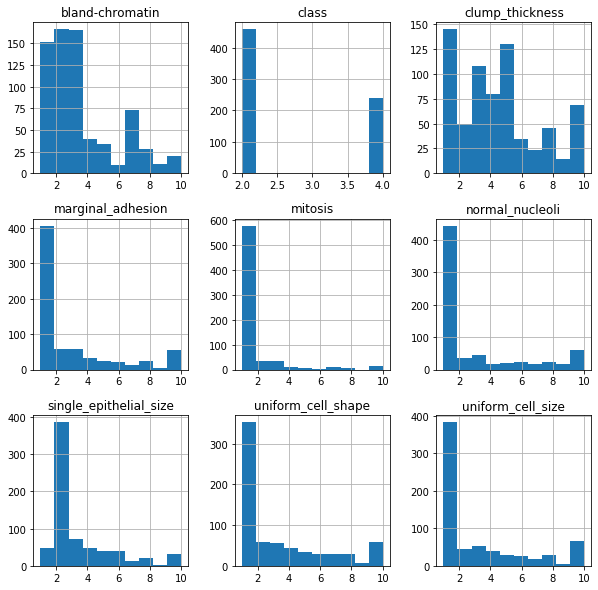

In [147]:
#Plot Histogram for each variable to visualize the dataset
df.hist(figsize=(10,10))
plt.show()

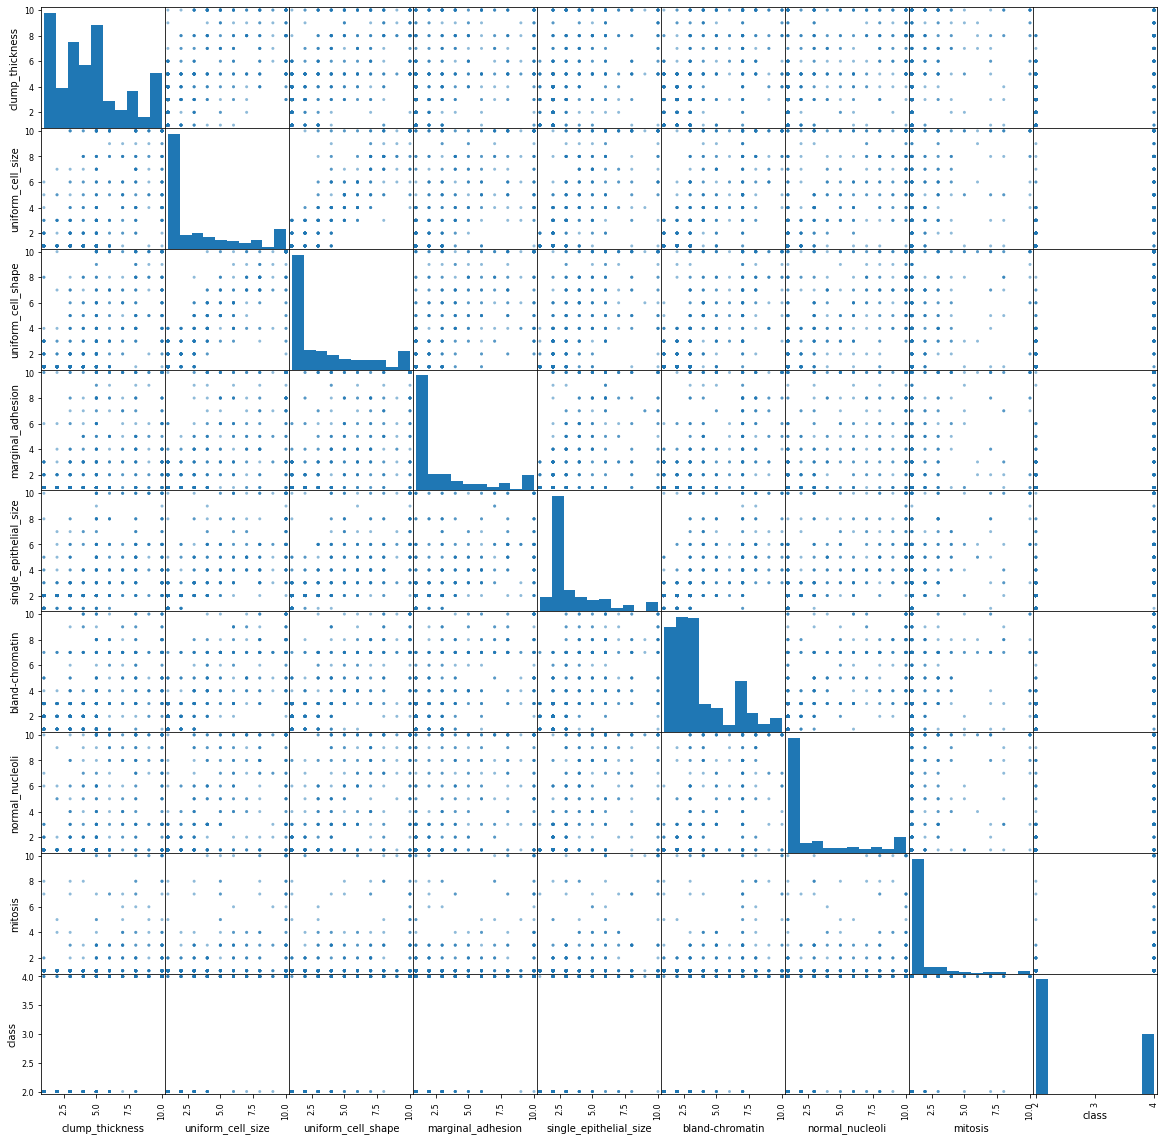

In [148]:
scatter_matrix(df,figsize=(20,20))
plt.show()

In [213]:
#Splitting the Data into training and test data
X = np.array(df.drop(['class'],axis = 1))
y = np.array(df['class'])
X_train , X_test , Y_train , Y_test = model_selection.train_test_split(X,y,test_size = .2) 

In [214]:
#Specify testing options
seed = 8
scoring = 'accuracy'

In [215]:
#Define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

#Evaluate result of each model
result = []
names = []

for name , model in models:
    kfold = model_selection.KFold(n_splits = 10 , random_state = seed)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv = kfold)
    result.append(cv_results)
    names.append(name)
    print(name,':',cv_results.mean(),cv_results.std())


KNN : 0.969577922077922 0.022674358624785156
SVM : 0.9552922077922077 0.02147675122807293


In [216]:
#Make prediction on test dataset
for name , model in models:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.96      0.98        84
           4       0.95      0.98      0.96        56

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9571428571428572
              precision    recall  f1-score   support

           2       1.00      0.93      0.96        84
           4       0.90      1.00      0.95        56

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [222]:
#OPTIONAL
#Some random prediction using SVM
clf = SVC()
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print('Accuracy = ',accuracy)

random_example = np.array([[4,2,1,1,1,2,3,2,4]])
random_example = random_example.reshape(len(random_example),-1)
prediction = clf.predict(random_example)
print('Example#1 : ',prediction)

random_example = np.array([[4,2,1,1,1,2,3,2,8]])
random_example = random_example.reshape(len(random_example),-1)
prediction = clf.predict(random_example)
print('Example#2 : ',prediction)

Accuracy =  0.9571428571428572
Example#1 :  [2]
Example#2 :  [4]


In [236]:
#OPTIONAL
#Some random prediction using KNN
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print('Accuracy : ',accuracy)

random_example = np.array([[4,2,1,1,1,2,3,2,4]])
random_example = random_example.reshape(len(random_example),-1)
prediction = clf.predict(random_example)
print('Example#1 : ',prediction)

random_example = np.array([[4,2,1,5,5,9,3,2,10]])
random_example = random_example.reshape(len(random_example),-1)
prediction = clf.predict(random_example)
print('Example#2 : ',prediction)

Accuracy :  0.9714285714285714
Example#1 :  [2]
Example#2 :  [4]
